## Simulación HGB definiendo la ventana de entrenamiento


In [ ]:
import pandas as pd

# Modelado
from sklearn.ensemble import HistGradientBoostingRegressor

# Para Importar funciones generadas ad-hoc
import importlib
import TFM_errores as tfm_err
importlib.reload(tfm_err)

C:\Users\Elena\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe


<module 'TFM_errores' from 'c:\\Users\\Elena\\OneDrive\\Desktop\\Proyecto PY KSChool_1\\TFM\\TFM_errores.py'>

# Carga datos / Definición TRAIN and TEST

In [ ]:
df_total= pd.read_csv('SET_INPUTS_TRAT_2.csv', sep=',', encoding='latin-1')

# 1) Asegura orden temporal (ajusta nombres de columnas)
df_total = df_total.sort_values(["time_idx"]).reset_index(drop=True)

# 2) Define features y target
X = df_total.drop(columns=['Price_Elec_EUR_MWh','Year','Month','Day','DayOfYear'], axis=1)
y = df_total['Price_Elec_EUR_MWh']


# División de los datos en train y test
y = y.loc[X.index]
print(len(X))

# Definición de la ventana
idx_train_ini = 830
train_days = 630
idx_train_fin = idx_train_ini + train_days

# Split
X_train = X.iloc[idx_train_ini:idx_train_fin]
X_test  = X.iloc[idx_train_fin:]


y_train = y.iloc[idx_train_ini:idx_train_fin]
y_test  = y.iloc[idx_train_fin:]

1826


## 1. Selección y entrenamiento del modelo


In [3]:
# 3) Define el modelo (puede ser tu Pipeline o tu RF ya tuneado)

model = HistGradientBoostingRegressor(
            random_state=42,
            loss="squared_error",
            max_depth=8,
            max_iter=1500,
            min_samples_leaf=30,
            l2_regularization=1e-4,
            learning_rate=0.1
)


X_train_drop= X_train.drop(columns=["time_idx"])
X_test_drop= X_test.drop(columns=["time_idx"])

model.fit(X_train_drop, y_train)

y_train_pred = model.predict(X_train_drop)
y_test_pred = model.predict(X_test_drop)

## 2. Análisis de OUTPUTS

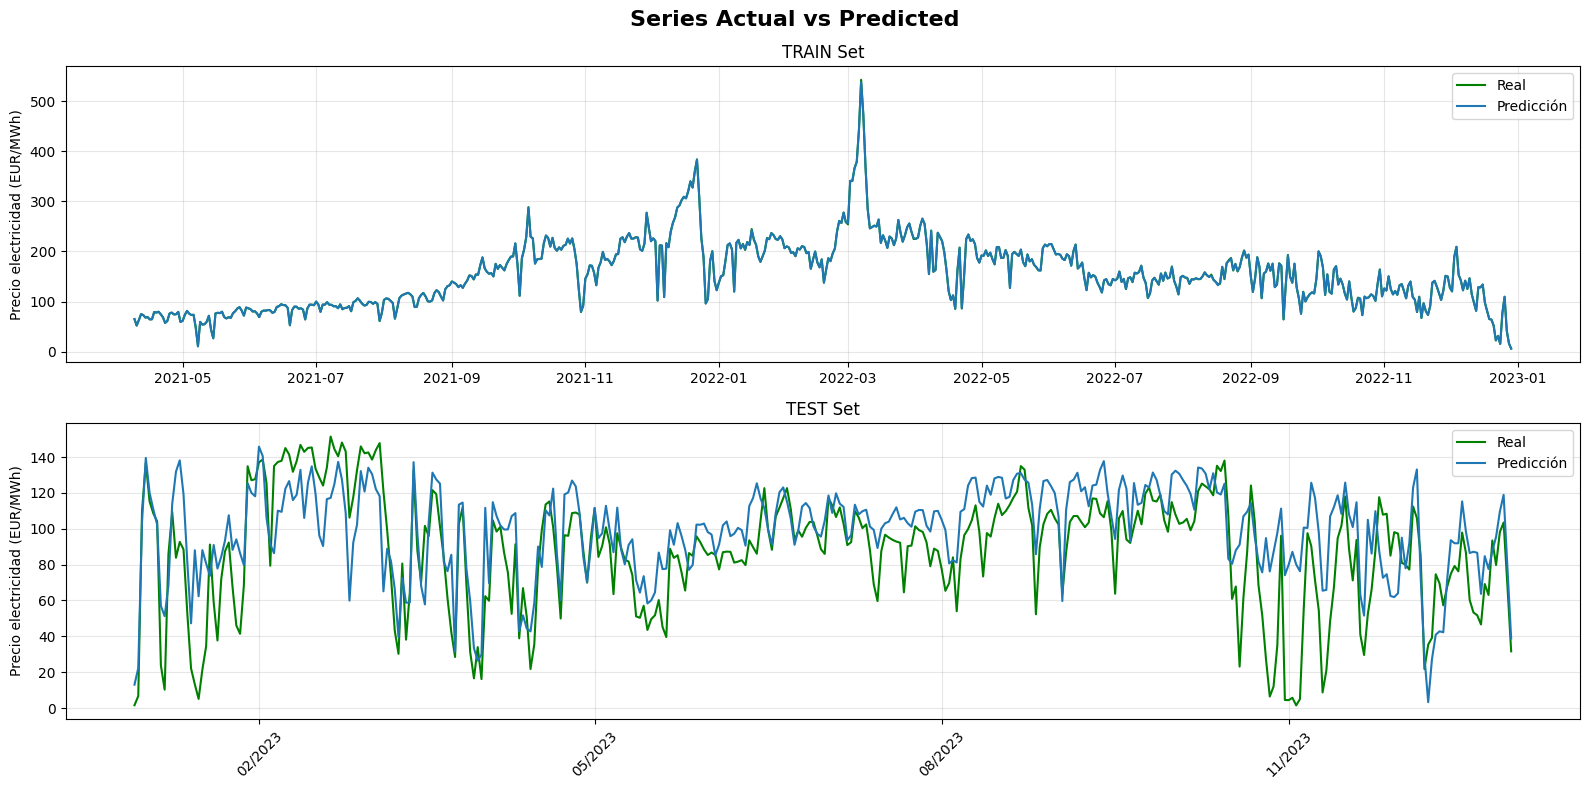


El error (rmse) de train es: 0.44 EUR/MWh
MAPE de train = 0.19 %
WAPE de train = 0.17 %
R2 train = 1.0000


c:\Users\Elena\OneDrive\Desktop\Proyecto PY KSChool_1\TFM\TFM_errores.py:497: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


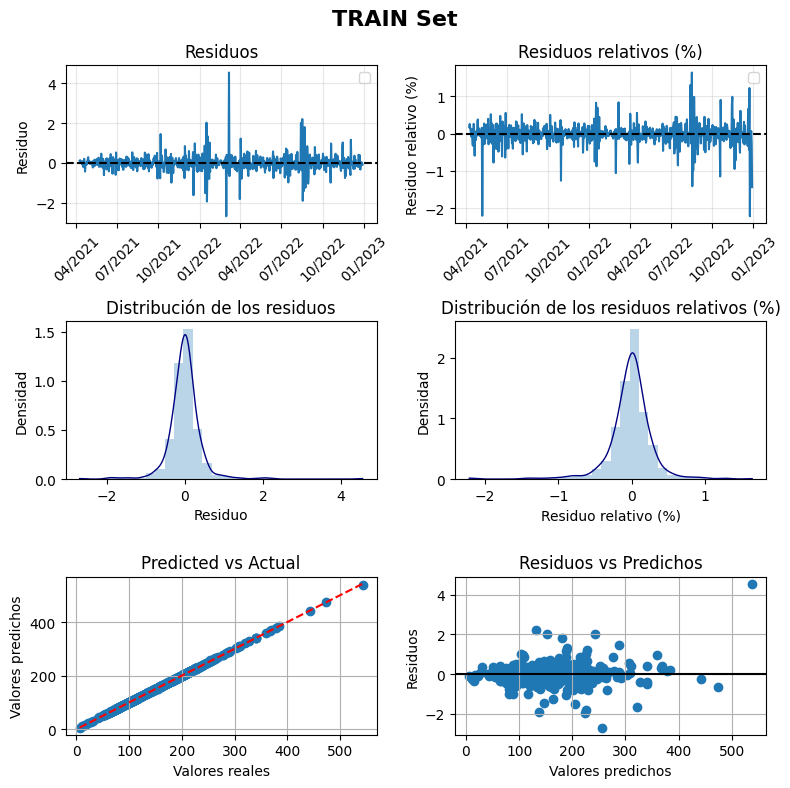


El error (rmse) de test es: 24.57 EUR/MWh
MAPE de test = 70.95 %
WAPE de test = 21.58 %
R2 test = 0.4396


c:\Users\Elena\OneDrive\Desktop\Proyecto PY KSChool_1\TFM\TFM_errores.py:604: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


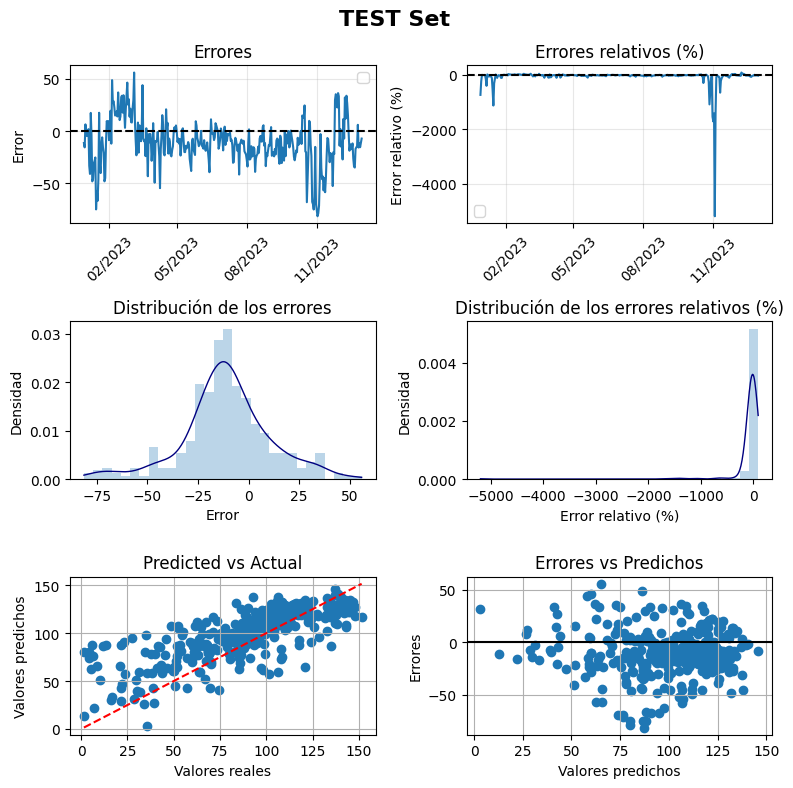

In [8]:
tfm_err.estudio_residuos_errores_index (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

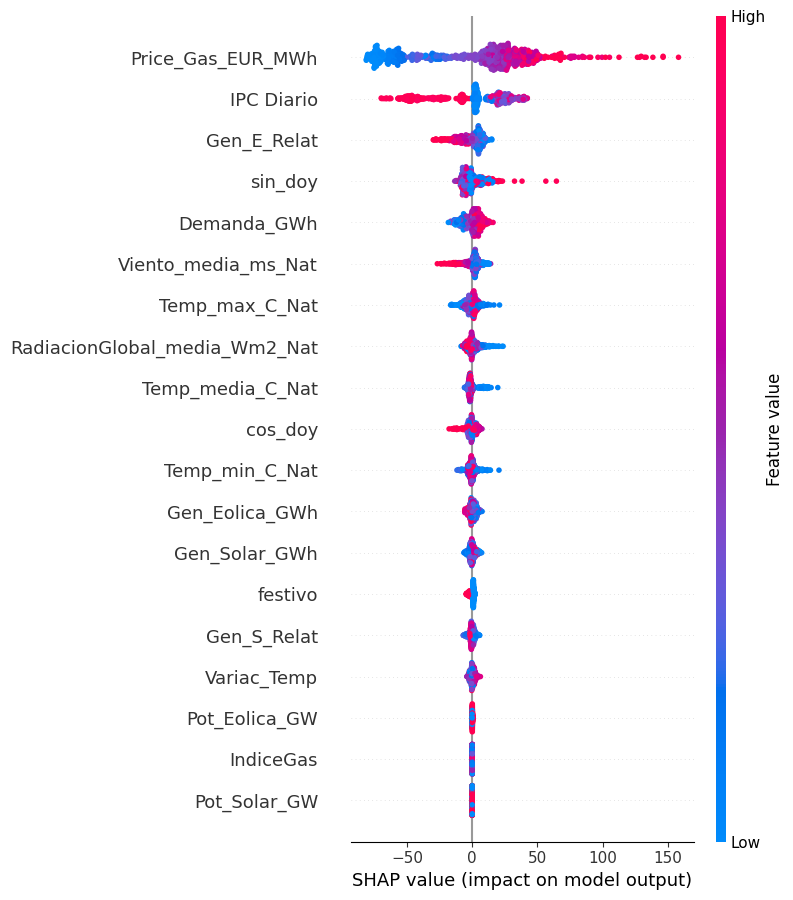

In [10]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_drop)

# Importancia global
shap.summary_plot(shap_values, X_train_drop)